In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

img = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/4.png', 0)
# img = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/Basic Problem B-01.PNG')


In [3]:
print(img.shape)

(184, 184, 3)


(179, 179)


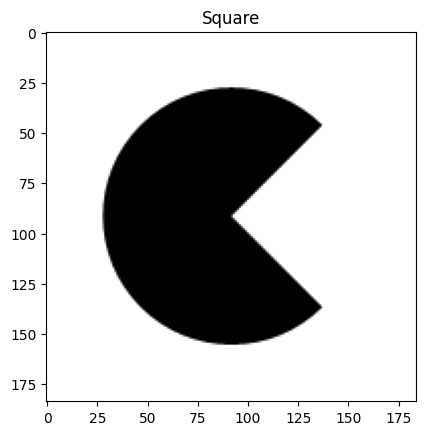

In [45]:
# show with matplotlib
if img is not None:
    # Convert the image from BGR to RGB format
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_crop = img[5:, :-5]
    print(img_crop.shape)
    # Plot the image using matplotlib
    
    # plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='grey')
    plt.title('Square')
    # plt.axis('off')  # Turn off axis labels
    plt.show()
    
else:
    print("Error: Image not found or unable to load.")

## Lets try to see if we can rotate an image

oh you may like this one, it has roations, reflection, scalling and cropping

[geek-stuff](https://www.geeksforgeeks.org/image-transformations-using-opencv-in-python/)


(184, 184)


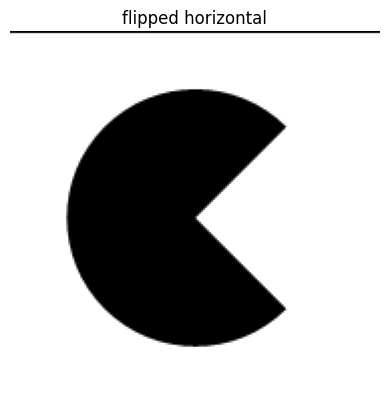

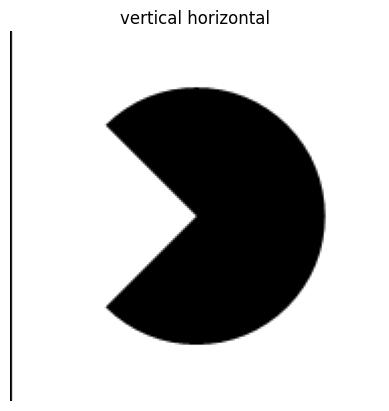

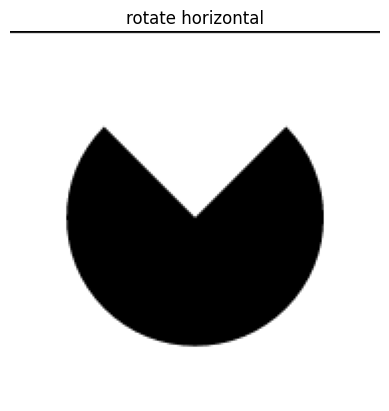

In [51]:
# flip/
# TODO: you may need to get rid of the line on the top with a crop
# from https://www.geeksforgeeks.org/image-transformations-using-opencv-in-python/
# also https://learnopencv.com/
if img is not None:
    print(img.shape)
    img_flipping = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/4.png',0)
    # # convert to grey so its a 2d array 
    # # https://stackoverflow.com/questions/21596281/how-does-one-convert-a-grayscale-image-to-rgb-in-opencv-python
    # cv2.cvtColor(img_flipping, cv2.COLOR_BGR2GRAY)
    
    # horizontally
    rows, cols = img_flipping.shape
    flip_horizontal = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
    horizontal_img = cv2.warpPerspective(img_flipping, flip_horizontal,
                                   (int(cols),
                                    int(rows)))

    
    
    # vertically 
    rows, cols = img_flipping.shape
    flip_vertical = np.float32([[-1, 0, cols], [0, 1, 0], [0, 0, 1]])
    vertical_img = cv2.warpPerspective(img_flipping, flip_vertical,
                                   (int(cols),
                                    int(rows)))
    
    # rotate 45 degrees
    rows, cols = img_flipping.shape[:2]
    M = np.float32([[1,  0, 0], [0, -1, rows], [0,  0, 1]])
    img_rotation = cv2.warpAffine(img_flipping,
                             cv2.getRotationMatrix2D((cols/2, rows/2),
                                                    90, 1),
                             (cols, rows))
    
    
    
    plt.imshow(horizontal_img, cmap='gray')
    plt.title('flipped horizontal')
    plt.axis('off')  # Turn off axis labels
    plt.show()


    plt.imshow(vertical_img, cmap='gray')
    plt.title('vertical horizontal')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    
    plt.imshow(img_rotation, cmap='gray')
    plt.title('rotate horizontal')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    

The function flip flips the array in one of three different ways (row and column indices are 0-based):
''' dst = cv.flip( src, flipCode ) '''
> src: input image
> flipCode: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

In [ ]:
# another approach
if img is not None:
    img_flip_horz = cv2.flip(img,1)
    img_flipped_vert = cv2.flip(img,0)
    img_flipped_both = cv2.flip(img,-1)

# threasholds

we can use a threashold to turn tie image into binary

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

Function Syntax
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
dst: The output array of the same size and type and the same number of channels as src.

The function has 4 required arguments:

src: input array (multiple-channel, 8-bit or 32-bit floating point).

thresh: threshold value.

maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

type: thresholding type (see ThresholdTypes).

in the OpenCV  cv2.threshold  function, the  retval  (short for "return value") is included in the function's output for a specific reason related to the thresholding operation. it just returns the threashold for future use

(184, 184)


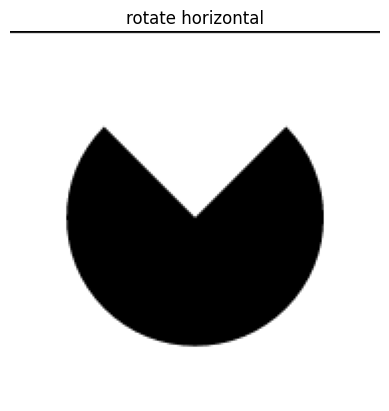

In [87]:
 if img is not None:
    retval, image_in_binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
    print(image_in_binary.shape)
    plt.imshow(img_rotation, cmap='gray')
    plt.title('rotate horizontal')
    plt.axis('off')  # Turn off axis labels
    plt.show()
     

# Bitwise

this will be useful for checking empty and negated values

Function Syntax
Example API for cv2.bitwise_and(). Others include: cv2.bitwise_or(), cv2.bitwise_xor(), cv2.bitwise_not()

dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
dst: Output array that has the same size and type as the input arrays.

The function has 2 required arguments:

src1: first input array or a scalar.

src2: second input array or a scalar.

An important optional argument is:

mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

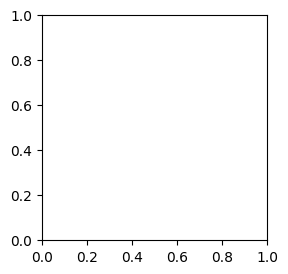

In [62]:
imageA = imread('Problems/Basic Problems B/Basic Problem B-11/A.png', 0)
imageB = imread('Problems/Basic Problems B/Basic Problem B-11/B.png', 0)
imageA_binary = cv2.threshold(imageA, 5, 255, cv2.THRESH_BINARY)
imageB_binary = cv2.threshold(imageB, 5, 255, cv2.THRESH_BINARY)

plt.figure() 

# Display imageA in the first subplot (1 row, 2 columns, 1st subplot)
plt.subplot(1,2,1).imshow(imageA_binary, cmap='gray')
plt.subplot(1,2,2).imshow(imageB_binary, cmap='gray')

#

plt.show()

print('next')

result_xor = cv2.bitwise_or(imageA_binary, imageB_binary, mask=None)
plt.imshow(result_xor, cmap='gray')

#TODO: figure out edge detection

#### Lets try to compare images

https://numpy.org/doc/2.1/reference/generated/numpy.array_equal.html

this can help us compare within threasholds

https://en.wikipedia.org/wiki/Mean_squared_error


# notes

> we may be able to only change the pixels with a value above 200(255)
> 

Shape similarity (lower is better): 0.0
Number of differing pixels in filled regions: 4518


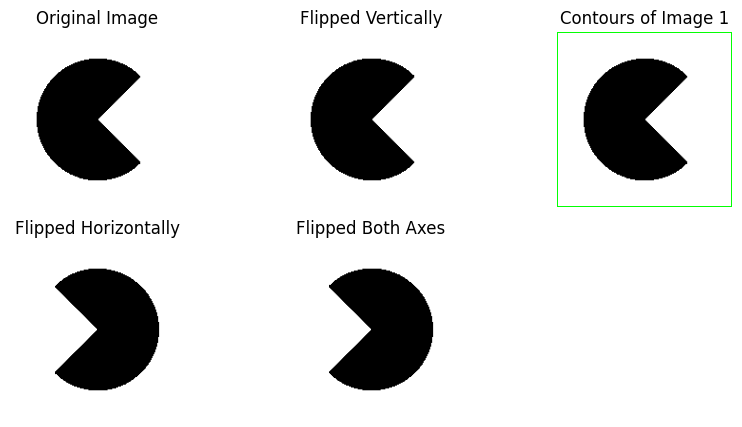

In [119]:
## som featuredetection can use keypoint
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Importing the correct library

# Load images
all_close1 = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/4.png', 0)
all_close2 = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/1.png', 0)

# Threshold to binary images
_, all_close1_grey = cv2.threshold(all_close1, 200, 255, cv2.THRESH_BINARY)
_, all_close2_grey = cv2.threshold(all_close2, 200, 255, cv2.THRESH_BINARY)

# Resize all_close2_grey to match all_close1_grey size (if they are different)
if all_close1_grey.shape != all_close2_grey.shape:
    all_close2_grey_resized = cv2.resize(all_close2_grey, (all_close1_grey.shape[1], all_close1_grey.shape[0]))
else:
    all_close2_grey_resized = all_close2_grey

# Step 1: Compare Shapes
# Find contours
contours1, _ = cv2.findContours(all_close1_grey, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(all_close2_grey_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert the grayscale image to BGR so we can draw colored contours
all_close1_grey_bgr = cv2.cvtColor(all_close1_grey, cv2.COLOR_GRAY2BGR)

# Draw the contours on the BGR image
all_close1_grey_contours = cv2.drawContours(image = all_close1_grey_bgr.copy(), 
                                            contours = contours1, 
                                            contourIdx = -1, 
                                            color = (0, 255, 0),  # Green color for contours
                                            thickness = 1)

# Compare contours if they exist
if contours1 and contours2:
    shape_similarity = cv2.matchShapes(contours1[0], contours2[0], cv2.CONTOURS_MATCH_I1, 0.0)
    print(f"Shape similarity (lower is better): {shape_similarity}")
else:
    print("One or both images have no contours to compare.")

# Step 2: Compare Filled Areas
# Bitwise XOR to check differences in filled regions
filled_diff = cv2.bitwise_xor(all_close1_grey, all_close2_grey_resized)

# Count the number of non-zero pixels (differences)
filled_diff_count = np.count_nonzero(filled_diff)
print(f"Number of differing pixels in filled regions: {filled_diff_count}")

# Plot the images using subplots
plt.figure(figsize=(10, 5))  # Define figure size, increased for 2 rows

# First Row
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, first subplot
plt.imshow(all_close1_grey, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Turn off axis labels

plt.subplot(2, 3, 2)  # 2 rows, 3 columns, second subplot
plt.imshow(cv2.flip(all_close1_grey, 0), cmap='gray')
plt.title('Flipped Vertically')
plt.axis('off')

# contours of 1
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, third subplot
plt.imshow(all_close1_grey_contours)
plt.title('Contours of Image 1')
plt.axis('off')

# Second Row
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, fourth subplot
plt.imshow(cv2.flip(all_close1_grey, 1), cmap='gray')
plt.title('Flipped Horizontally')
plt.axis('off')

plt.subplot(2, 3, 5)  # 2 rows, 3 columns, fifth subplot
plt.imshow(cv2.flip(all_close1_grey, -1), cmap='gray')
plt.title('Flipped Both Axes')
plt.axis('off')

# Show the plot
plt.show()




Shape similarity (lower is better): 0.0
Number of differing pixels in filled regions: 4518


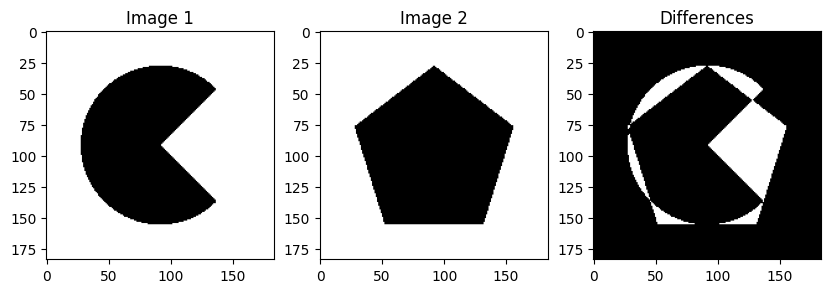

In [100]:
# lets try with contours
# https://learnopencv.com/contour-detection-using-opencv-python-c/

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
all_close1 = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/4.png', 0)
all_close2 = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/1.png', 0)

# Threshold to binary images
_, all_close1_grey = cv2.threshold(all_close1, 200, 255, cv2.THRESH_BINARY)
_, all_close2_grey = cv2.threshold(all_close2, 200, 255, cv2.THRESH_BINARY)

# Resize all_close2_grey to match all_close1_grey size (if they are different)
if all_close1_grey.shape != all_close2_grey.shape:
    all_close2_grey_resized = cv2.resize(all_close2_grey, (all_close1_grey.shape[1], all_close1_grey.shape[0]))
else:
    all_close2_grey_resized = all_close2_grey

# Step 1: Compare Shapes
# Find contours
contours1, _ = cv2.findContours(all_close1_grey, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(all_close2_grey_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Compare contours if they exist
if contours1 and contours2:
    shape_similarity = cv2.matchShapes(contours1[0], contours2[0], cv2.CONTOURS_MATCH_I1, 0.0)
    print(f"Shape similarity (lower is better): {shape_similarity}")
else:
    print("One or both images have no contours to compare.")

# Step 2: Compare Filled Areas
# Bitwise XOR to check differences in filled regions
filled_diff = cv2.bitwise_xor(all_close1_grey, all_close2_grey_resized)

# Count the number of non-zero pixels (differences)
filled_diff_count = np.count_nonzero(filled_diff)
print(f"Number of differing pixels in filled regions: {filled_diff_count}")

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1).imshow(all_close1_grey, cmap='gray')
plt.title('Image 1')
plt.subplot(1, 3, 2).imshow(all_close2_grey_resized, cmap='gray')
plt.title('Image 2')
plt.subplot(1, 3, 3).imshow(filled_diff, cmap='gray')
plt.title('Differences')
plt.show()


# edge detection

[geeks](https://www.geeksforgeeks.org/python-opencv-canny-function/)

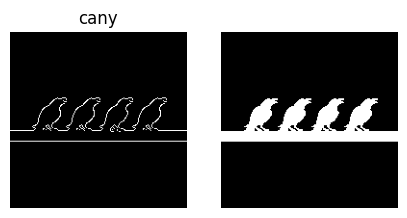

In [6]:
import cv2
import matplotlib.pyplot as plt
# image_12 = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/5.png')
image_12 = cv2.imread('Problems/Challenge Problems E/Challenge Problem E-12/4.png')

image_12_grey = cv2.cvtColor(image_12, cv2.COLOR_BGR2GRAY)
_, image_12_threshold_img = cv2.threshold(image_12_grey, 200, 255, cv2.THRESH_BINARY_INV)

# lower and upper threashods
Cany12 = cv2.Canny(image_12_threshold_img, 100, 200)

plt.figure(figsize=(5, 5))

plt.subplot(1,2,1)
plt.title("cany")
plt.imshow(Cany12, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(image_12_threshold_img, cv2.COLOR_GRAY2RGB))
plt.axis('off')

plt.show()

Shape similarity: 2.741204394843625


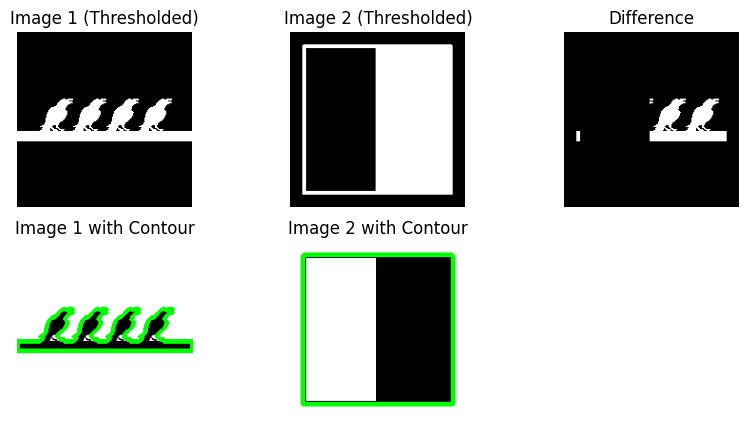

In [32]:
## ok lets try with contours for fill
# https://www.youtube.com/watch?v=WtYWOJ6hV6Y
import cv2
import matplotlib.pyplot as plt

# Load images
image_crow1 = cv2.imread('Problems/Challenge Problems E/Challenge Problem E-12/4.png')
image_crow2 = cv2.imread('Problems/Basic Problems B/Basic Problem B-08/6.png')

# Invert images
image_crow1_grey_inv = cv2.cvtColor(image_crow1, cv2.COLOR_BGR2GRAY)
_, image_crow1_threshold_img = cv2.threshold(image_crow1_grey_inv, 180, 255, cv2.THRESH_BINARY_INV)
image_crow2_grey_inv = cv2.cvtColor(image_crow2, cv2.COLOR_BGR2GRAY)
_, image_crow2_threshold_img = cv2.threshold(image_crow2_grey_inv, 180, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours1, _ = cv2.findContours(image_crow1_threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(image_crow2_threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours (if needed)
# if len(contours1) > 1:
#     contour1 = max(contours1, key=cv2.contourArea)
# if len(contours2) > 1:
#     contour2 = max(contours2, key=cv2.contourArea)

# Iterate over each contour in contours1 and contours2
for contour in contours1:
    # Process each contour in contours1
    # For example, you can draw each contour on an image
    cv2.drawContours(image_crow1, [contour], -1, (0, 255, 0), 2)

for contour in contours2:
    # Process each contour in contours2
    # For example, you can draw each contour on an image
    cv2.drawContours(image_crow2, [contour], -1, (0, 255, 0), 2)

# Calculate shape similarity
if contours1 and contours2:
    shape_similarity = cv2.matchShapes(contour1, contour2, cv2.CONTOURS_MATCH_I1, 0.0)
    print("Shape similarity:", shape_similarity)

# Draw contours with adjusted parameters
image_crow1_with_contours = image_crow1.copy()
cv2.drawContours(image_crow1_with_contours, [contour1], -1, (0, 255, 0), 3)

image_crow2_with_contours = image_crow2.copy()
cv2.drawContours(image_crow2_with_contours, [contour2], -1, (0, 255, 0), 3)

# Calculate difference
crows_difference = cv2.bitwise_and(image_crow1_threshold_img, image_crow2_threshold_img)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(image_crow1_threshold_img, cmap='gray')
plt.title('Image 1 (Thresholded)')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(image_crow2_threshold_img, cmap='gray')
plt.title('Image 2 (Thresholded)')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(crows_difference, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(image_crow1_with_contours)
plt.title('Image 1 with Contour')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(image_crow2_with_contours)
plt.title('Image 2 with Contour')
plt.axis('off')

plt.show()

# This can find images that are the same in other orentations


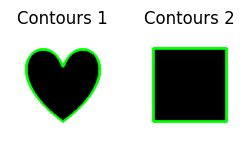

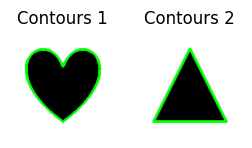

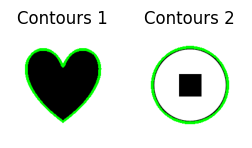

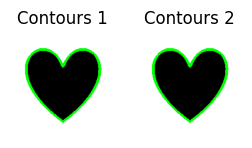

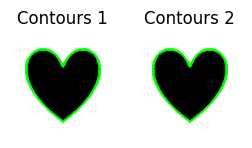

Similarity to 3: 0.02888193850317866
Similarity to 4: 0.2399387471901054
Similarity to 5: 0.06109947089119627
Similarity to base: 0.0
Similarity to flip 0.0


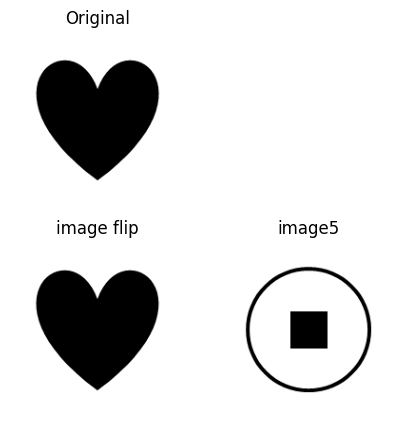

In [47]:
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
import cv2
import numpy as np
import matplotlib.pyplot as plt

match_image_base = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/6.png')
match_image3 = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/2.png')
match_image4 = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/3.png')
match_image5 = cv2.imread('Problems/Basic Problems B/Basic Problem B-10/2.png')

def compare_images(image1, image2):

    grey_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    grey_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding
    _, thresh1 = cv2.threshold(grey_image1, 127, 255, cv2.THRESH_BINARY_INV)
    _, thresh2 = cv2.threshold(grey_image2, 127, 255, cv2.THRESH_BINARY_INV)
    
    contours1, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    

    
    if not contours1 or not contours2:
        return float('inf')  # Return a large value if no contours are found
    
    # Compare the first contour of each image
    similarity = cv2.matchShapes(contours1[0], contours2[0], 1, 0.0)
    
    
    # NOT NEEDED draws contours on image
    img_with_contour1 = cv2.drawContours(image1.copy(), contours1, -1, (0, 255, 0), 3)
    img_with_contour2 = cv2.drawContours(image2.copy(), contours2, -1, (0, 255, 0), 3)
    # Display images with contours
    plt.figure(figsize=(3, 3))
    plt.subplot(1, 2, 1)
    plt.title('Contours 1')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_with_contour1, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title('Contours 2')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_with_contour2, cv2.COLOR_BGR2RGB))
    plt.show()
    
    return similarity

    # Draw contours on the original images


# Example usage
similarity1 = compare_images(match_image_base, match_image3)
similarity2 = compare_images(match_image_base, match_image4)
similarity3 = compare_images(match_image_base, match_image5)
similarity_base = compare_images(match_image_base, match_image_base)
similarty_flip = compare_images(match_image_base, cv2.flip(match_image_base, 1))
print(f"Similarity to 3: {similarity1}")
print(f"Similarity to 4: {similarity2}")
print(f"Similarity to 5: {similarity3}")
print(f"Similarity to base: {similarity_base}")
print(f"Similarity to flip {similarty_flip}")

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original')
plt.imshow(cv2.cvtColor(match_image_base, cv2.COLOR_BGR2RGB))

# plt.subplot(2, 2, 2)
# plt.title('image3')
# plt.axis('off')
# plt.imshow(cv2.cvtColor(match_image3, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.title('image flip')
plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.flip(match_image_base, 1), cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title('image5')
plt.axis('off')
plt.imshow(cv2.cvtColor(match_image5, cv2.COLOR_BGR2RGB))
plt.show()

# lets use 

In [ ]:
# https://github.com/muratbakirtas/opencv-and-machine-learning
# https://docs.opencv.org/4.x/d0/d49/tutorial_moments.html
# https://learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/

def compare_images_with_orb(image1, image2, orientation_threshold=30):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(image1, None)
    kp2, des2 = orb.detectAndCompute(image2, None)

    # Create a Brute Force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    good_matches = []
    differences = []  # Store orientation differences

    for m in matches:
        # Compare the orientations of matched keypoints
        angle_diff = abs(kp1[m.queryIdx].angle - kp2[m.trainIdx].angle)
        if angle_diff < orientation_threshold:
            good_matches.append(m)
        else:
            differences.append(angle_diff)

    print(f"Number of good matches after orientation filtering: {len(good_matches)}")
    
    if differences:
        print(f"Orientation differences in excluded matches: {differences}")
    else:
        print("No significant orientation differences found.")
    
    # For visualization (optional)
    img_matches = cv2.drawMatches(image1, kp1, image2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show matches in notebook using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.title("ORB Keypoint Matches")
    plt.axis('off')
    plt.show()

# Load images
image1 = cv2.imread('Problems/Basic Problems B/Basic Problem B-06/B.png')
image2 = cv2.flip(image1, 1)
image3 = cv2.flip(image2, 0)
image4 = cv2.flip(cv2.imread('Problems/Basic Problems B/Basic Problem B-06/5.png'),1)
image5 = cv2.imread('Problems/Basic Problems B/Basic Problem B-06/4.png')


compare_images_with_orb(image1, image2)
compare_images_with_orb(image1, image3)
compare_images_with_orb(image1, image4)
compare_images_with_orb(image1, image5)

# Compare shapes

  
  
plt.figure(figsize=(5,5))
plt.axis('off')
plt.subplot(2,3,1)
plt.title('image1')
plt.axis('off')
plt.imshow(image1)
plt.subplot(2,3,2)
plt.title('image2')
plt.axis('off')
plt.imshow(image2)
plt.subplot(2,3,3)
plt.title('image3')
plt.axis('off')
plt.imshow(image3)
plt.subplot(2,3,4)
plt.title('image4')
plt.axis('off')
plt.imshow(image4)
plt.subplot(2,3,5)
plt.title('image5')
plt.axis('off')
plt.imshow(image5)

plt.show()

Pixel difference between image 1 and image 2: 11210
Pixel difference between image 1 and image 3: 21810
Pixel difference between image 1 and image 4: 22
Pixel difference between image 1 and image 5: 11885
Similar images: [(1, 4)]


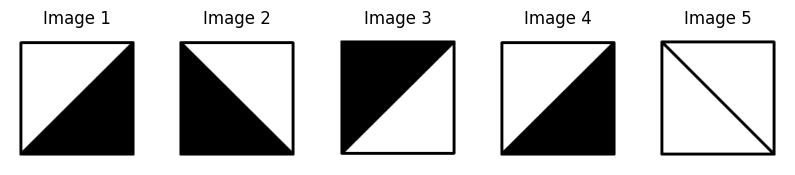

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images (ensure you adjust the paths to your images)
image1 = cv2.imread('Problems/Basic Problems B/Basic Problem B-06/B.png', 0)
image2 = cv2.flip(image1, 1)
image3 = cv2.flip(image2, 0)
image4 = cv2.flip(cv2.imread('Problems/Basic Problems B/Basic Problem B-06/5.png', 0), 1)
image5 = cv2.imread('Problems/Basic Problems B/Basic Problem B-06/4.png', 0)

# Threshold the images to binary (if not already done)
_, thresh1 = cv2.threshold(image1, 200, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(image2, 200, 255, cv2.THRESH_BINARY)
_, thresh3 = cv2.threshold(image3, 200, 255, cv2.THRESH_BINARY)
_, thresh4 = cv2.threshold(image4, 200, 255, cv2.THRESH_BINARY)
_, thresh5 = cv2.threshold(image5, 200, 255, cv2.THRESH_BINARY)

# Compare pixel-wise similarity
def compare_pixels(imageA, imageB):
    diff = cv2.absdiff(imageA, imageB)
    non_zero_count = np.count_nonzero(diff)
    return non_zero_count

# Calculate pixel differences
pixel_diff_12 = compare_pixels(thresh1, thresh2)
pixel_diff_13 = compare_pixels(thresh1, thresh3)
pixel_diff_14 = compare_pixels(thresh1, thresh4)
pixel_diff_15 = compare_pixels(thresh1, thresh5)

# Set a threshold for pixel similarity
pixel_threshold = 1000  # Adjust based on your needs

similar_images = []
if pixel_diff_12 < pixel_threshold:
    similar_images.append((1, 2))
if pixel_diff_13 < pixel_threshold:
    similar_images.append((1, 3))
if pixel_diff_14 < pixel_threshold:
    similar_images.append((1, 4))
if pixel_diff_15 < pixel_threshold:
    similar_images.append((1, 5))

# Print results
print(f"Pixel difference between image 1 and image 2: {pixel_diff_12}")
print(f"Pixel difference between image 1 and image 3: {pixel_diff_13}")
print(f"Pixel difference between image 1 and image 4: {pixel_diff_14}")
print(f"Pixel difference between image 1 and image 5: {pixel_diff_15}")
# print(f"Pixel difference between image 5 and image 5: {pixel_diff_16}")
print(f"Similar images: {similar_images}")

# Plot the images
images = [image1, image2, image3, image4, image5]
titles = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5']

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

